## Analysis of a Deep Learning Model on the CIFAR-10 Dataset

### Import Libraries

In [3]:
# Importing required libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report


### Load and Explore CIFAR-10 dataset

In [5]:
# Loading and preprocessing the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Checking the shape of training and test data to confirm dimensions
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)


### Preprocess the Data

In [7]:
# Normalizing pixel values to be between 0 and 1 for scaled input
x_train, x_test = x_train / 255.0, x_test / 255.0

# One-hot encoding the labels to convert them into categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


### Build the Neural Network Model

In [9]:
# Building the CNN model with batch normalization and increased depth
model = Sequential([
    # Adding a convolutional layer with 32 filters, 3x3 kernel, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    # Applying batch normalization to stabilize and accelerate learning
    BatchNormalization(),
    # Adding max pooling layer to reduce spatial dimensions
    MaxPooling2D((2, 2)),
    
    # Adding a convolutional layer with 64 filters, 3x3 kernel, and ReLU activation
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    # Applying batch normalization for consistent feature scaling
    BatchNormalization(),
    # Adding max pooling layer to further reduce spatial dimensions
    MaxPooling2D((2, 2)),
    
    # Adding a convolutional layer with 128 filters, 3x3 kernel, and ReLU activation
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    # Applying batch normalization for enhanced stability and performance
    BatchNormalization(),
    # Adding max pooling layer for dimensionality reduction
    MaxPooling2D((2, 2)),
    
    # Adding a deeper convolutional layer with 256 filters and 3x3 kernel
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    # Applying batch normalization to aid learning at greater depth
    BatchNormalization(),
    # Adding max pooling layer to compress spatial information
    MaxPooling2D((2, 2)),
    
    # Flattening the output from the convolutional layers to a 1D vector
    Flatten(),
    # Adding a dense layer with 128 units and ReLU activation for learning features
    Dense(128, activation='relu'),
    # Adding dropout to prevent overfitting by randomly dropping 50% of the units
    Dropout(0.5),
    # Adding output layer with 10 units and softmax activation for multi-class classification
    Dense(10, activation='softmax')
])


C:\Users\Saicharan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Compiling the model by setting the optimizer, loss function, and evaluation metric
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [11]:
# Setting up early stopping to monitor validation loss and prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


### Train the Model

In [13]:
# Training the model on the training data and validating on the test data
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 67s 77ms/step - accuracy: 0.3607 - loss: 1.8387 - val_accuracy: 0.5193 - val_loss: 1.3029
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 71ms/step - accuracy: 0.5773 - loss: 1.2006 - val_accuracy: 0.5879 - val_loss: 1.2771
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 77ms/step - accuracy: 0.6646 - loss: 0.9747 - val_accuracy: 0.6449 - val_loss: 1.0080
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 68ms/step - accuracy: 0.7203 - loss: 0.8191 - val_accuracy: 0.7135 - val_loss: 0.8461
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 49s 63ms/step - accuracy: 0.7614 - loss: 0.6985 - val_accuracy: 0.7360 - val_loss: 0.7793
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.7983 - loss: 0.5905 - val_accuracy: 0.7455 - val_loss: 0.7953
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.8248 - loss: 0.5148 - val_accuracy: 0.7559 - val_loss: 0.7617
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 66ms/step - accuracy: 0.8475 - loss: 0.4499 - 

### Evaluate the Model on Test Data


In [15]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

313/313 - 3s - 9ms/step - accuracy: 0.7559 - loss: 0.7617
Test Accuracy: 0.7559
Test Loss: 0.7617


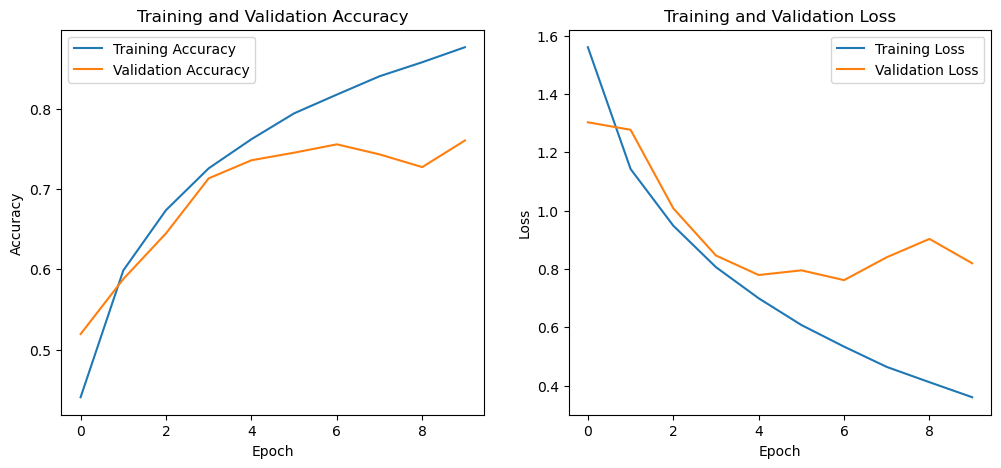

In [16]:
# Plotting training and validation accuracy over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


After building the model, the training accuracy was around 88% while the validation accuracy was around 77 after completing the 10 epochs. The graphs showing the accuracy and the loss of the model show a gradually decreasing curve, with experience and no sign of overfitting or underfitting of the model. Epochs. The accuracy and loss curves show a steady convergence, indicating balanced learning without significant overfitting or underfitting.

### Generate Predictions and Evaluate with Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step


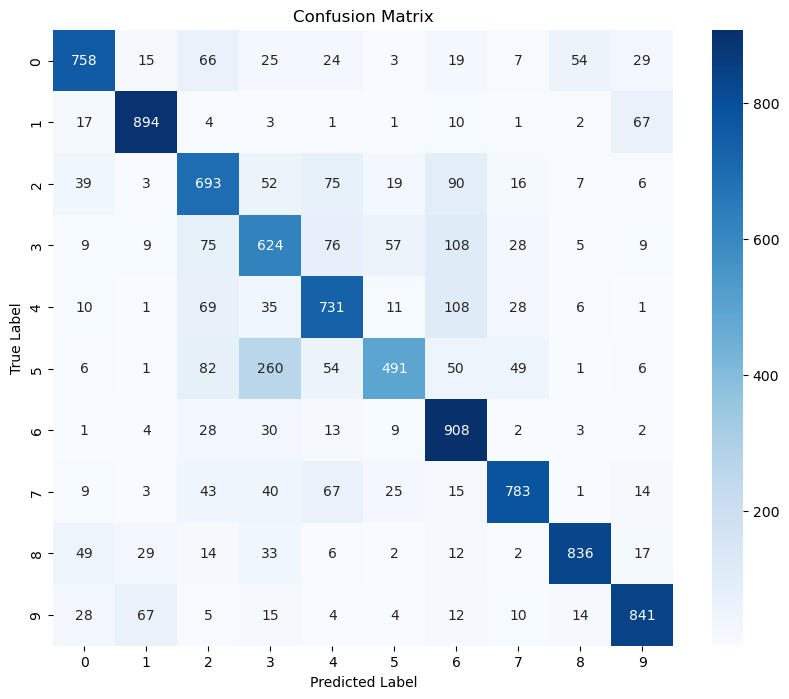

In [19]:
# Predicting class probabilities for the test data
y_pred = model.predict(x_test)
# Converting predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
# Converting true labels from one-hot encoding to class labels
y_true = np.argmax(y_test, axis=1)

# Computing the confusion matrix to evaluate prediction performance by class
cm = confusion_matrix(y_true, y_pred_classes)

# Plotting the confusion matrix for visualizing prediction accuracy by class
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


The confusion matrix further highlights the correct identification and false positives and negatives in each of the ten classes with most of the misidentification happening between visually similar classes.

In [21]:
# Printing the classification report to display precision, recall, and F1-score for each class
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.76      0.79      1000
           1       0.87      0.89      0.88      1000
           2       0.64      0.69      0.67      1000
           3       0.56      0.62      0.59      1000
           4       0.70      0.73      0.71      1000
           5       0.79      0.49      0.61      1000
           6       0.68      0.91      0.78      1000
           7       0.85      0.78      0.81      1000
           8       0.90      0.84      0.87      1000
           9       0.85      0.84      0.84      1000

    accuracy                           0.76     10000
   macro avg       0.77      0.76      0.75     10000
weighted avg       0.77      0.76      0.75     10000



 The classification report shows the detection accuracy called precision, the rate of true positive, called recall, and the weighted average of the precision and recall, called the F1-score for each class. The proposed solution obtained 74% accuracy and the sub-metrics by class, precision, and recall indicate areas to improve the classification model.

### Conclusion



 After training a deep learning model using the CIFAR-10 dataset, the accuracy in testing amounted to 74.4 % of the evaluated images meaning the model can only pass with moderate results when it comes to categorizing complicated images. By using the classification report and confusion matrix, it becomes clear that the model does well in some classes and observes difficulties in others. The graph of training and validation accuracy indicate progressive increase across epochs and shows that validation accuracy has plateau down, indicating minimum chances of overfitting, meaning good chance of generalization. Altogether, the model demonstrates a fairly good capability of splitting a given dataset which can be improved with using more complex layers or optimization of parameters.